# Google Play Store Apps 

## About Dataset

**Context**

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**

Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**

This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

## load data and initail steps of EDA

In [2]:
df = pd.read_csv('./Dataset/googleplaystore.csv')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

## shape of our data is 10841 rows and 13 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Gotta Make Size, Installs and Price columns as numarics because they are as objects

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
df['Size'].isnull().sum()

np.int64(0)

# Size Column 

## observation
### contains objecs as 'Varies with device', 'M' and 'k' and no missing values

In [11]:
# values containing 'M'
size_M = df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

In [12]:
# values containing 'k'
size_K = df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

In [13]:
# values containing 'Varies with device'
size_V = df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

In [14]:
print(size_M+size_K+size_V)

10841


In [15]:
len(df)

10841

# observation 
### only 3 objects Values are there
#### We will convert these size to float values of bytes from objects

In [16]:
def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k',"")) * 1024
        elif 'M' in size:
            return float(size.replace('M',""))*1024*1024
        else:
            return np.nan
    return size

In [17]:
df['Size'].head(10)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object

In [18]:
df['Size'] = df['Size'].apply(convert_size)

In [19]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
df.rename(columns={'Size':'size_in_bytes'},inplace=True)

In [21]:
df.head(2)

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### Adding size in MB column

In [22]:
df['size-in_Mb'] = df['size_in_bytes'].apply(lambda x : x/(1024*1024))

In [23]:
df.head(2)

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size-in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0


# Installs Column


In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df['Installs'].isnull().sum()

np.int64(0)

# Observations
##### no Null Values in Installs column
##### gotta remove (+) sign
##### gotta remove (,)
##### Convert To Integer

In [26]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace("+","") if '+' in str(x) else x)

In [27]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [28]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(",","") if ',' in str(x) else x)

In [29]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [30]:
df['Installs'] = df['Installs'].astype('int64')

In [31]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [32]:
df.Installs.dtype

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [33]:
df.Installs.max()

np.int64(1000000000)

In [34]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1,0,10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [35]:
df.Installs_category.head()

0              Moderate
1                  High
2             Very High
3             Top Notch
4    More than moderate
Name: Installs_category, dtype: category
Categories (8, object): ['no' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'Very High' < 'Top Notch']

In [36]:
df['Installs_category'].value_counts().sort_values()

Installs_category
no                      15
Very low               535
Top Notch              828
Moderate              1531
More than moderate    1648
Very High             2004
High                  2118
Low                   2162
Name: count, dtype: int64

# Price Column

In [37]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

# Observations
##### There is $ sign We Gotta remove that

In [38]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [39]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [40]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, Length: 92, dtype: int64

In [41]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


In [42]:
df.describe()

,Rating,Reviews,size_in_bytes,Installs,Price,size-in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Observations:

- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# Handling Missing Values

In [43]:
df.isnull().sum().sort_values(ascending=False)

size_in_bytes        1695
size-in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [44]:
df.rename(columns={'size-in_Mb':'size_in_Mb'},inplace=True)

In [45]:
round(df.isnull().sum()/len(df)*100,2)

App                   0.00
Category              0.01
Rating               13.60
Reviews               0.00
size_in_bytes        15.64
Installs              0.00
Type                  0.01
Price                 0.00
Content Rating        0.00
Genres                0.01
Last Updated          0.00
Current Ver           0.07
Android Ver           0.02
size_in_Mb           15.64
Installs_category     0.00
dtype: float64

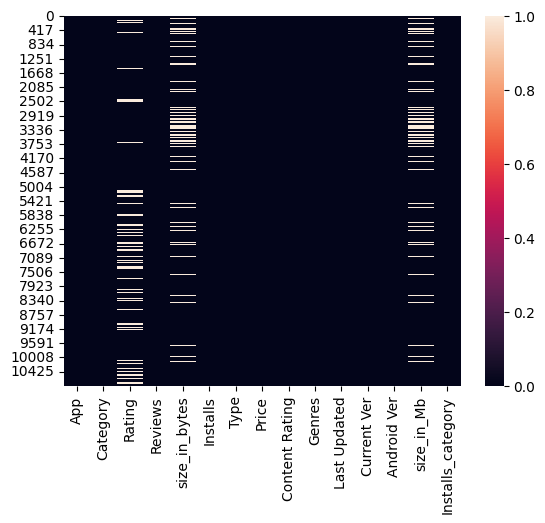

In [46]:
sns.heatmap(df.isnull())
plt.show()

## size_in_bytes and size_in_Mb are same so Ratings Have Most missing values

# Observations:
- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

<Axes: >

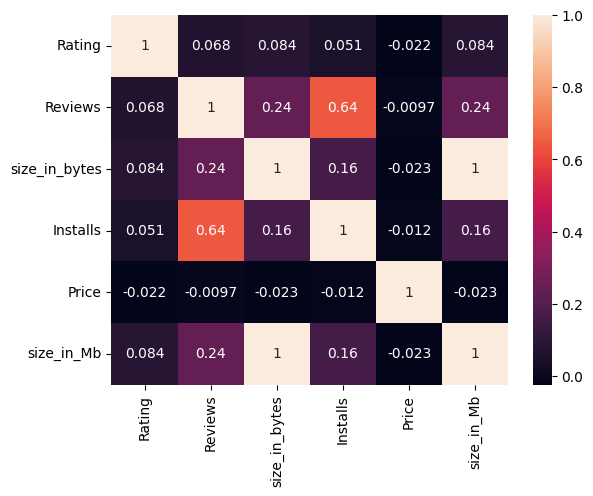

In [47]:
numeric_cols = ['Rating', 'Reviews', 'size_in_bytes', 'Installs', 'Price', 'size_in_Mb']
sns.heatmap(df[numeric_cols].corr(), annot=True) 

In [48]:
df[numeric_cols].corr()

,Rating,Reviews,size_in_bytes,Installs,Price,size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


# Observations

- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.64 according to corr(). Which is quite good.
    - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
        - If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
- Installs is slightly correlated with Size_in_Mb or Size_in_bytes , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
-------

- Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [49]:
len(df)

10841

In [50]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'],inplace=True)

In [51]:
len(df)

10829

In [52]:
10841-10829

12

- We have removed 12 rows having null values in the Current Ver, Android Ver, Category, Type and Genres columns.

In [53]:
df.isnull().sum().sort_values(ascending=False)

size_in_bytes        1694
size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

# Observations

- Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
    - We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
    - In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [54]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

<Axes: xlabel='Installs_category', ylabel='Rating'>

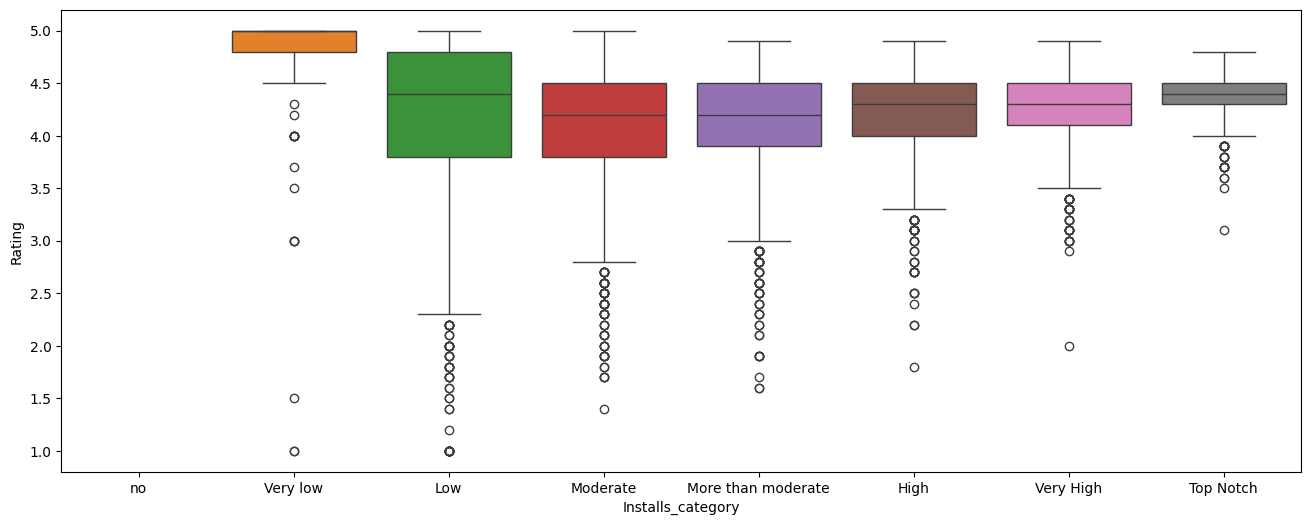

In [55]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df)

In [56]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

<Axes: xlabel='Installs_category', ylabel='Reviews'>

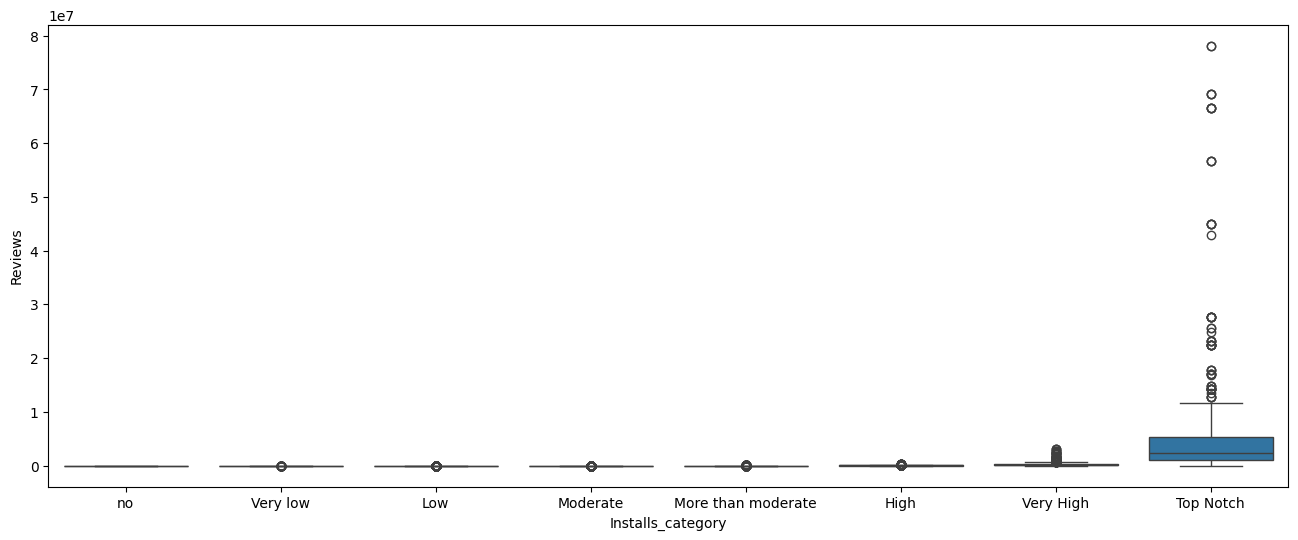

In [57]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category', y= 'Reviews', data=df)

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

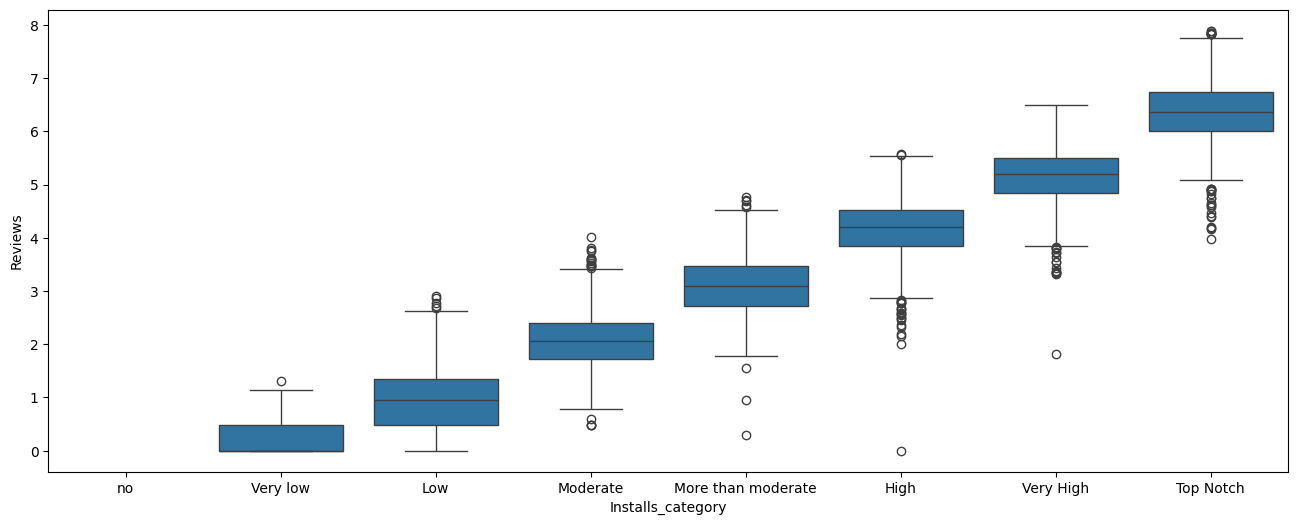

In [58]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df)

<Axes: xlabel='Rating', ylabel='Reviews'>

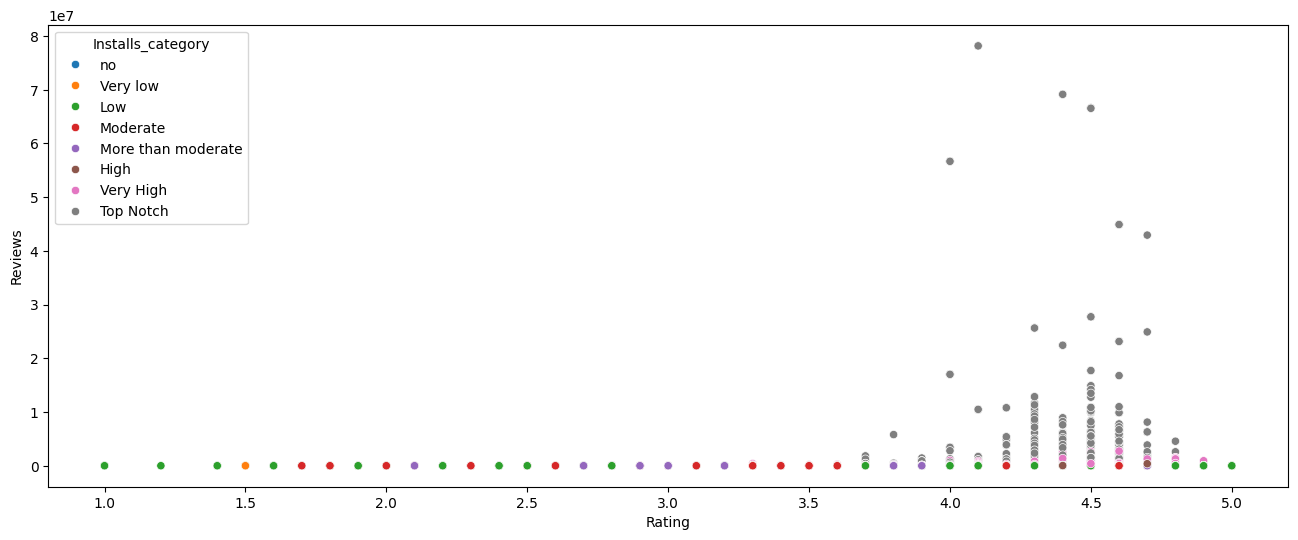

In [59]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) 

# Duplicates

- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [62]:
df.duplicated().sum()

np.int64(483)

483 duplicated rows

In [63]:
df['App'].duplicated().sum()

np.int64(1181)

In [65]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [70]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,Installs_category
5415,365Scores - Live Scores,SPORTS,4.6,666246,26214400.0,10000000,Free,0.0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.0,Very High
3083,365Scores - Live Scores,SPORTS,4.6,666521,26214400.0,10000000,Free,0.0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.0,Very High
1755,8 Ball Pool,GAME,4.5,14200344,54525952.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,52.0,Top Notch
1703,8 Ball Pool,GAME,4.5,14198602,54525952.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,52.0,Top Notch
1871,8 Ball Pool,GAME,4.5,14201891,54525952.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,52.0,Top Notch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,29360128.0,10000000,Free,0.0,Everyone,Social,"July 26, 2018",7.3.1,4.1 and up,28.0,Very High
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,35651584.0,10000000,Free,0.0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,34.0,Very High
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,35651584.0,10000000,Free,0.0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,34.0,Very High
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,39845888.0,10000000,Free,0.0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,38.0,Very High


### Remove Duplicates

In [67]:
df.drop_duplicates(inplace=True)

In [69]:
len(df)

10346

### from 10829 Rows to we Are now At 10346 Rows after duplicate removal

#  Insights from Data

### Which category has the highest number of apps?

In [73]:
df.Category.value_counts().head()

Category
FAMILY      1939
GAME        1121
TOOLS        841
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64

- FAMILY     
- GAME        
- TOOLS       
- BUSINESS     
- MEDICAL\
  Has The Highest number of apps

### Which category has the highest number of installs?

In [74]:
df.groupby('Category')['Installs'].sum()

Category
ART_AND_DESIGN           124333100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1916468576
BUSINESS                 863664865
COMICS                    56086150
COMMUNICATION          24152276251
DATING                   206536107
EDUCATION                533952000
ENTERTAINMENT           2455660000
EVENTS                    15973161
FAMILY                 10041632405
FINANCE                  770348734
FOOD_AND_DRINK           257898751
GAME                   31544024415
HEALTH_AND_FITNESS      1361022512
HOUSE_AND_HOME           125212461
LIBRARIES_AND_DEMO        61995910
LIFESTYLE                534823539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   42204177
NEWS_AND_MAGAZINES      5393217760
PARENTING                 31521110
PERSONALIZATION         2074483782
PHOTOGRAPHY             9721247655
PRODUCTIVITY           12463091369
SHOPPING                2573348785
SOCIAL                 12513867902
SPORTS     

In [78]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head()

Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452271905
Name: Installs, dtype: int64

### Which category has the highest number of reviews?

In [79]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head()

Category
GAME             1415536650
COMMUNICATION     601273552
SOCIAL            533576829
FAMILY            396771746
TOOLS             273181033
Name: Reviews, dtype: int64

### Which category has the highest rating?

In [83]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
SHOPPING               4.251485
WEATHER                4.244000
SPORTS                 4.225175
PRODUCTIVITY           4.201796
FAMILY                 4.191264
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.182895
MEDICAL                4.182450
LIBRARIES_AND_DEMO     4.179688
HOUSE_AND_HOME         4.164706
FOOD_AND_DRINK         4.164151
COMICS                 4.155172
COMMUNICATION          4.151466
ENTERTAINMENT          4.136036
NEWS_AND_MAGAZINES     4.128505
FINANCE                4.127445
BUSINESS               4.102593
LIFESTYLE              4.096066
TRAVEL_AND_LOCAL       4.094146
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

## number of installs for free vs paid apps 

<Axes: xlabel='Type', ylabel='Installs'>

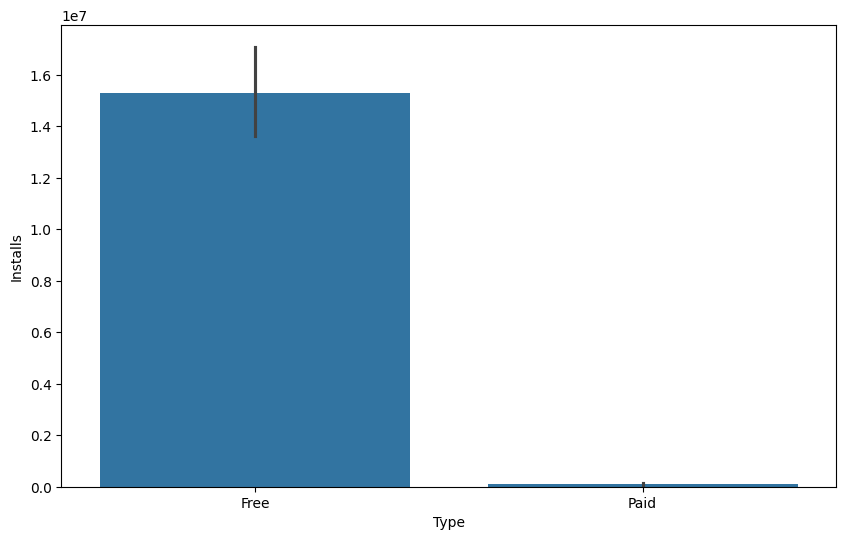

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(df,x='Type',y='Installs')

<Axes: xlabel='Type', ylabel='Installs'>

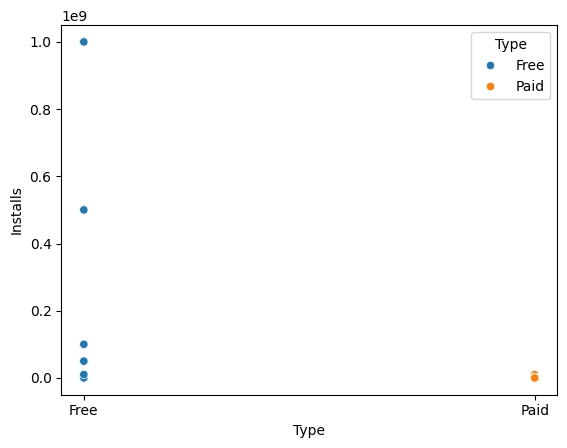

In [92]:
sns.scatterplot(df,x='Type',y='Installs',hue='Type')

## Size_in_Mb vs Installs_category

<Axes: xlabel='Installs_category', ylabel='size_in_Mb'>

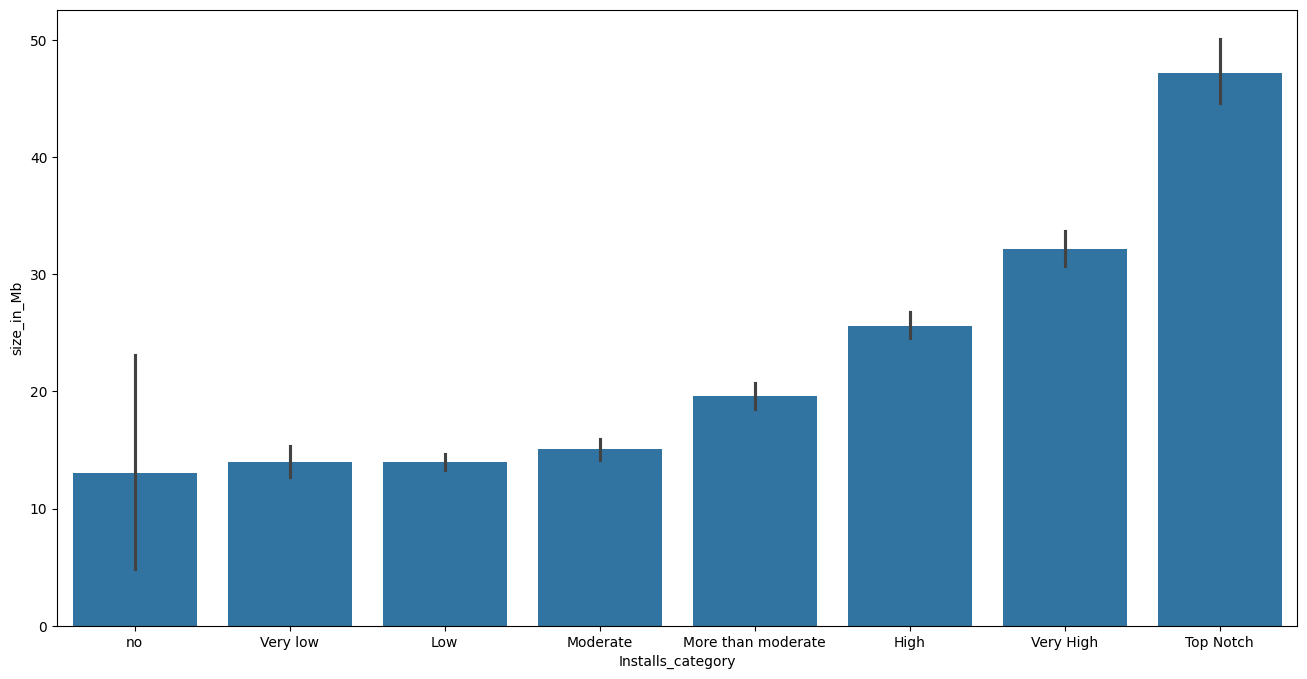

In [112]:
plt.figure(figsize=(16,8))
sns.barplot(df,x='Installs_category', y='size_in_Mb')

In [99]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

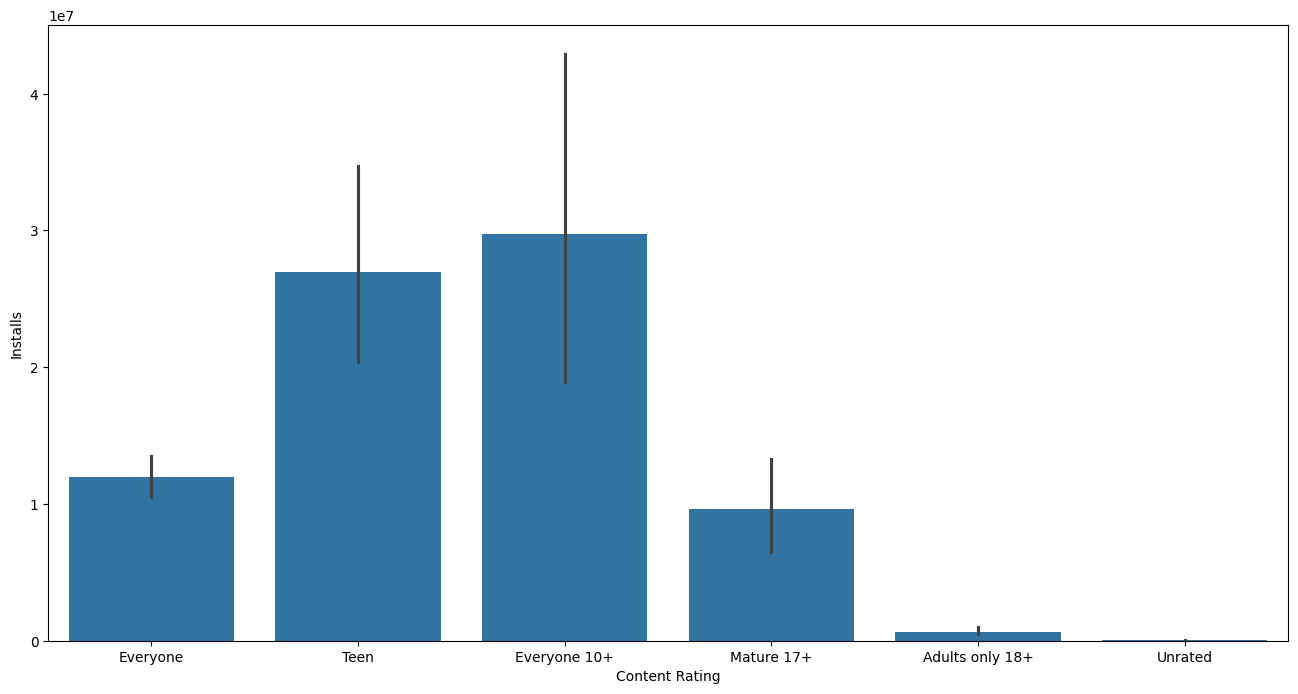

In [101]:
plt.figure(figsize=(16,8))
sns.barplot(df,x='Content Rating', y='Installs')

## Top 5 Free Apps By Installs

<Axes: xlabel='App', ylabel='Installs'>

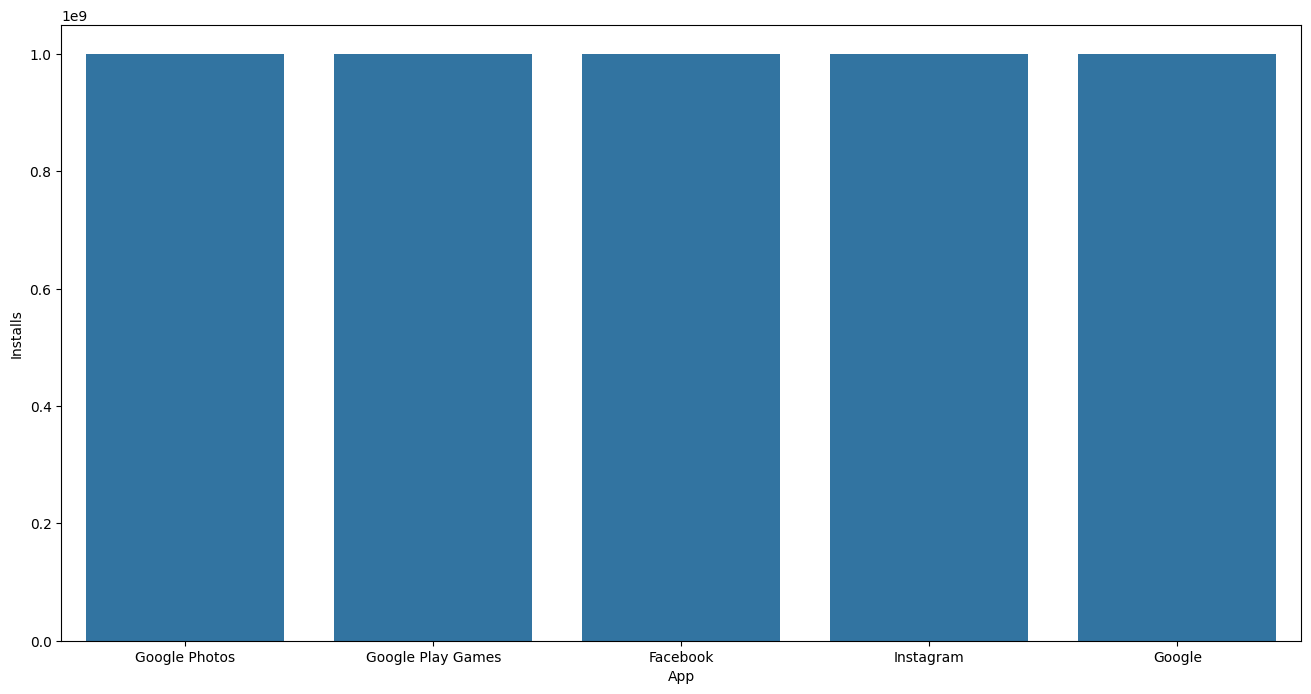

In [117]:
plt.figure(figsize=(16,8))
sns.barplot(x='App',y='Installs',data=df[df['Type'] == 'Free'].sort_values(by='Installs',ascending=False).head())

## top 5 free apps by reviews

<Axes: xlabel='App', ylabel='Reviews'>

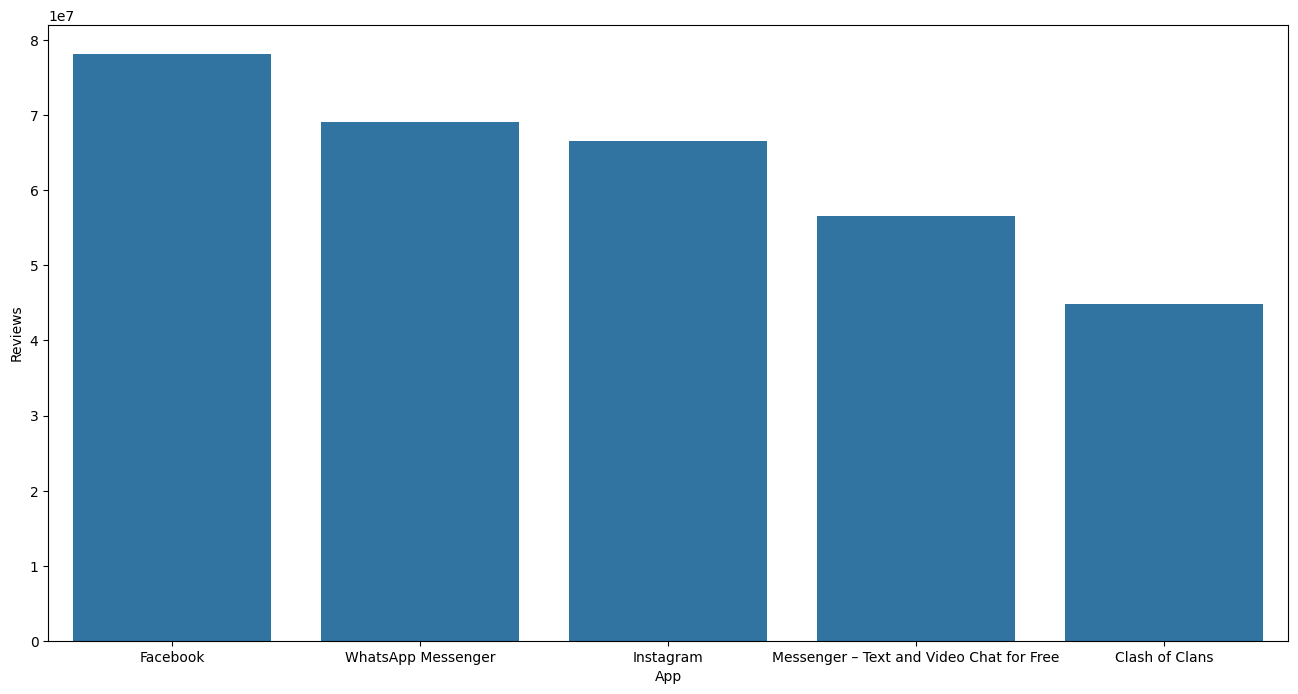

In [116]:
plt.figure(figsize=(16,8))
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(10))

## Plot top 5 Paid apps with highest number of reviews

<Axes: xlabel='App', ylabel='Reviews'>

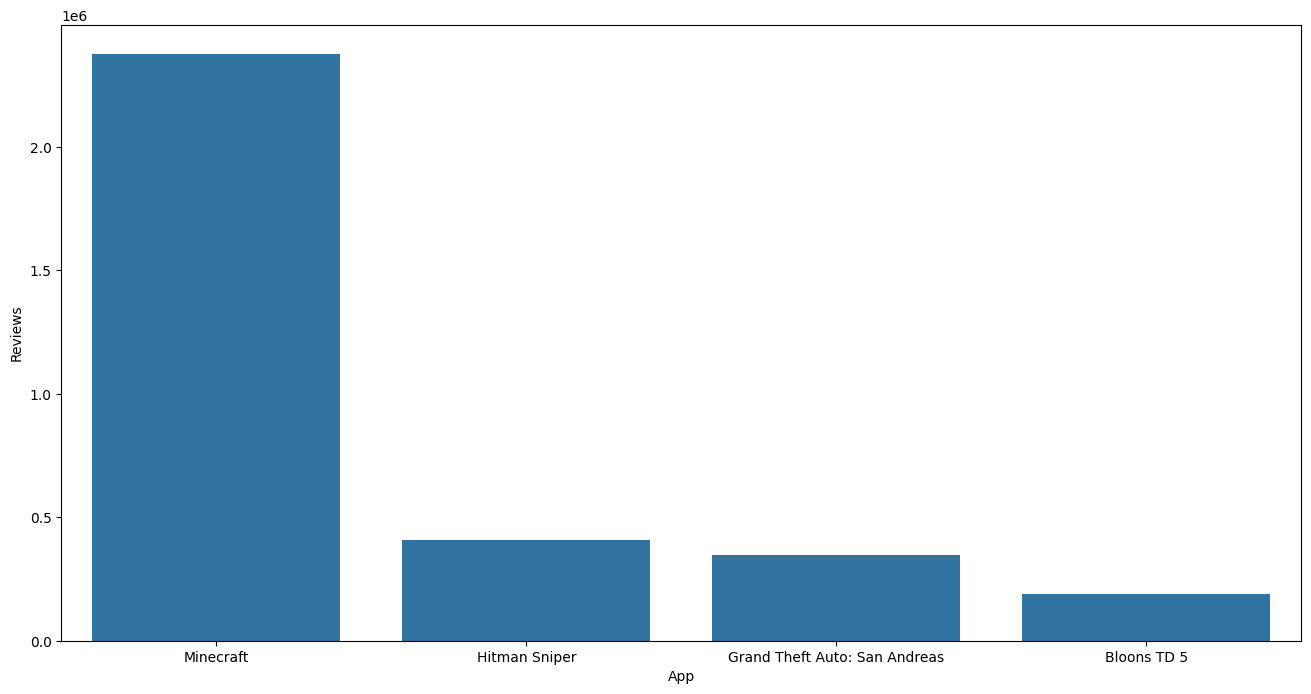

In [118]:
plt.figure(figsize=(16, 8)) 
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5))

## Conclusion

This analysis of the Google Play Store dataset has uncovered significant insights into the mobile app ecosystem. Key findings include:

- **Diverse App Categories:** A detailed examination of app categories revealed distinct trends in user preferences and market saturation. Certain categories dominate due to their wide appeal, while niche categories show promise for targeted strategies.
- **Rating and Review Dynamics:** The correlation between user ratings, reviews, and app performance emphasizes the importance of quality and user engagement. Positive user feedback is a strong indicator of app success, while negative trends highlight areas for improvement.
- **Installation and Pricing Strategies:** Our exploration of download trends has highlighted the critical balance between pricing models and user acquisition. The data suggests that strategic pricing can significantly impact an app's market presence and user reach.

Overall, this project demonstrates the power of exploratory data analysis in revealing hidden patterns and informing strategic decisions. Future work could include predictive modeling to forecast app performance and deeper segmentation analysis to further understand user behavior. The insights drawn here lay a solid foundation for advanced analytics and targeted business strategies in the dynamic world of mobile apps.

---